
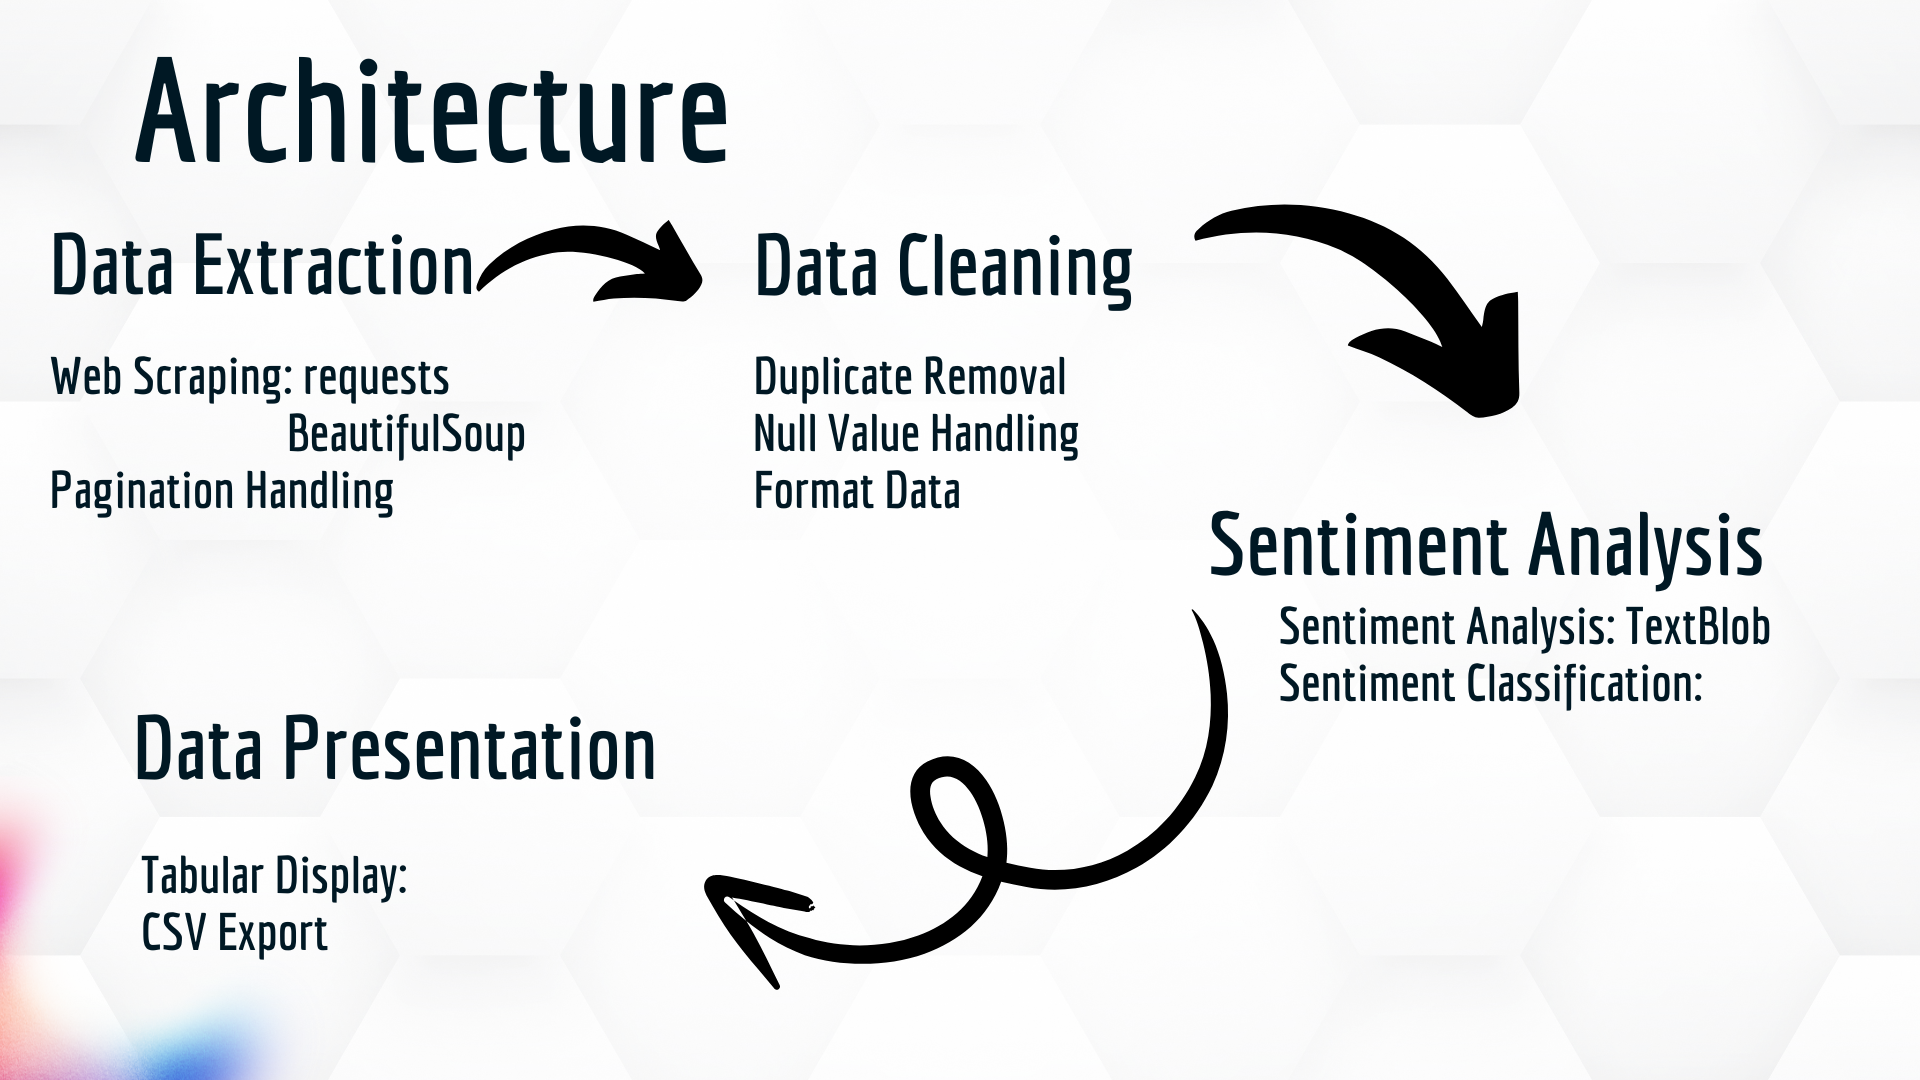

## Playwright Overview

Playwright is an open-source library developed by Microsoft that provides a high-level API to control browsers over the DevTools Protocol. It supports all modern web browsers including Chrome, Firefox, and Safari, and allows you to write scripts in JavaScript, Python, and C#.

### Key Features:
- **Cross-Browser Testing**: Supports Chrome, Firefox, and Safari.
- **Automatic Waiting**: Ensures the UI is in a stable state before executing commands.
- **Multi-Language Support**: Available in JavaScript, Python, and C#.
- **Powerful and Reliable**: Ideal for web scraping, automating form submissions, UI testing, and more.

Playwright's Python API provides an easy-to-use, Pythonic way of harnessing the power of this tool.


## Comparing Playwright with Other Web Scraping Tools

### Selenium
Selenium is a popular tool for automating browsers. It is robust and flexible but has some drawbacks:
- **Performance**: Slower compared to Playwright and Puppeteer because it communicates with browsers through WebDriver.
- **Modern Browser Support**: Lacks some advanced features for handling JavaScript-heavy websites.

### Scrapy and Beautiful Soup
Both Scrapy and Beautiful Soup are powerful Python libraries used for web scraping. However, they have limitations:
- **JavaScript-Heavy Sites**: Struggle with modern websites that heavily rely on JavaScript for loading and displaying data.
- **Functionality**: Primarily focused on parsing static HTML, making them less suitable for dynamic content.

### Puppeteer
Puppeteer is another popular tool for browser automation and web scraping, developed by the Chrome team. It shares many functionalities with Playwright:
- **Browser Support**: Playwright supports more browsers compared to Puppeteer.
- **Waiting Mechanisms**: Playwright offers better handling of waiting mechanisms.
- **Python API**: Provides a more Pythonic API, making it easier for Python developers to use.


## ***Step 1: Introduction and Setup***

## Installing and Setting Up Playwright Python API

Before we can start using Playwright, we need to install it. The installation process is straightforward:

1. **Install the Playwright package**:
   Open your terminal or command prompt and run the following command:
   ```bash
   pip install playwright


In [13]:
# Install required libraries
!pip install playwright
!pip install requests
!pip install pandas
# Update package lists
!apt-get update
!apt-get install -y \
    libwoff1 \
    libgstreamer1.0-dev \
    libgstreamer-plugins-base1.0-dev \
    libharfbuzz-dev \
    libenchant-2-dev \
    libsecret-1-dev \
    libhyphen-dev \
    libmanette-0.2-dev

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,284 kB]
Get:14 https://r2u.stat.illinois.edu/ubuntu jammy/main

## ***Step 2: Import Libraries***

In [14]:
# Import necessary libraries
import requests
import pandas as pd
import time
import playwright
from playwright.async_api import async_playwright
import nest_asyncio
import asyncio

In [15]:
!playwright install
!apt-get install -y xvfb
!pip install pyvirtualdisplay
!pip install playwright

Playwright Host validation warning: 
╔══════════════════════════════════════════════════════╗
║ Host system is missing dependencies to run browsers. ║
║ Missing libraries:                                   ║
║     libgstcodecparsers-1.0.so.0                      ║
╚══════════════════════════════════════════════════════╝
    at validateDependenciesLinux (/usr/local/lib/python3.10/dist-packages/playwright/driver/package/lib/server/registry/dependencies.js:216:9)
    at process.processTicksAndRejections (node:internal/process/task_queues:95:5)
    at async Registry._validateHostRequirements (/usr/local/lib/python3.10/dist-packages/playwright/driver/package/lib/server/registry/index.js:575:43)
    at async Registry._validateHostRequirementsForExecutableIfNeeded (/usr/local/lib/python3.10/dist-packages/playwright/driver/package/lib/server/registry/index.js:673:7)
    at async Registry.validateHostRequirementsForExecutablesIfNeeded (/usr/local/lib/python3.10/dist-packages/playwright/driver/p

## ***Step 3: Data Extraction with Playwright***

## Navigating and Interacting with the Website

Let's begin our web scraping venture. Our target for this exercise is [https://cointelegraph.com/learn/who-is-vitalik-buterin](https://cointelegraph.com/learn/who-is-vitalik-buterin). We'll be navigating this website and extracting information from it.

### Opening a Webpage

Here's how you can open a webpage using Playwright:

```python
from playwright.async_api import async_playwright

url = "https://cointelegraph.com/learn/who-is-vitalik-buterin"



In [16]:
try:
    from playwright.async_api import async_playwright
    print("Playwright installed and imported successfully!")
except ImportError as e:
    print(f"Error importing Playwright: {e}")


Playwright installed and imported successfully!


In [25]:
from playwright.async_api import async_playwright
import nest_asyncio
import asyncio

nest_asyncio.apply()

async def get_text_content():
    url = "https://cointelegraph.com/learn/who-is-vitalik-buterin"

    async with async_playwright() as pw:
        browser = await pw.chromium.launch(headless=True)
        context = await browser.new_context(
            user_agent='Your Custom User Agent Here'  # Replace with your desired user agent
        )
        page = await context.new_page()
        await page.goto(url)
        await page.wait_for_load_state('networkidle')  # Wait for the page to fully load

        # Get all the text content of the page
        text_content = await page.inner_text('body')  # Adjust selector if necessary

        await browser.close()

        # Save text_content to a file for the next cell to process
        with open('text_content.txt', 'w') as file:
            file.write(text_content)

# Run the async function
asyncio.run(get_text_content())

## ***Step 4: Data Cleaning***

## Handling Common Challenges and Errors

Web scraping isn't always a walk in the park. You may encounter various challenges and errors, from not being able to locate elements and handling dynamic content to dealing with websites that load content via AJAX or implementing anti-bot measures. Here's how you can handle these common issues:

### 1. Locating Elements

If you're unable to locate elements on a webpage, ensure that you:
- **Use the Correct Selectors**: Double-check the selectors you are using. They should match the HTML structure of the page.
- **Wait for Elements**: Sometimes elements are loaded dynamically. Use Playwright’s waiting mechanisms like `page.wait_for_selector()` to ensure elements are present before interacting with them.

```python
await page.wait_for_selector('div.content')


In [37]:
import pandas as pd

# Read the text content from the file
with open('text_content.txt', 'r') as file:
    text_content = file.read()

# Split text content into sentences
sentences = text_content.split('. ')

# Format sentences into 2-sentence chunks
formatted_content = ['. '.join(sentences[i:i+2]) for i in range(0, len(sentences), 2)]

# Create a DataFrame with the formatted content
df = pd.DataFrame({'content': formatted_content})

# Save the DataFrame to a CSV file
df.to_csv('formatted_content.csv', index=False)


In [38]:
df

,content
0,"BTC\n$56,709\n-0.28%\nETH\n$2,392\n-0.78%\nBNB..."
1,"He understood that he could construct a new, p..."
2,"Smart contracts, which are essentially program..."
3,"He lived in Russia until the age of six, and t..."
4,"As he recalls, quite a few people talked about..."
5,The school changed his perception of education...
6,"However, when Blizzard decided to remove the d..."
7,"He was initially suspicious, and he couldn’t s..."
8,"So, he looked for work in Bitcoin on various f..."
9,"He was writing, traveling, and working on cryp..."


In [39]:
# Load the DataFrame from the CSV file
df = pd.read_csv('formatted_content.csv')

In [40]:
# Remove rows with empty values in the 'content' column
df = df[df['content'].str.strip() != '']

In [41]:
#Remove the first row of the DataFrame
df = df.iloc[1:].reset_index(drop=True)

In [42]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_content.csv', index=False)

In [43]:
df

,content
0,"He understood that he could construct a new, p..."
1,"Smart contracts, which are essentially program..."
2,"He lived in Russia until the age of six, and t..."
3,"As he recalls, quite a few people talked about..."
4,The school changed his perception of education...
5,"However, when Blizzard decided to remove the d..."
6,"He was initially suspicious, and he couldn’t s..."
7,"So, he looked for work in Bitcoin on various f..."
8,"He was writing, traveling, and working on cryp..."
9,"After being refused by the existing projects, ..."


## ***Step 5: Generate Keywords***

In [44]:
# Load the cleaned DataFrame from the CSV file
df = pd.read_csv('cleaned_content.csv')

# Define expanded keywords for tagging
keywords_dict = {
    'Ethereum': [
        'Ethereum', 'ETH', 'Vitalik Buterin', 'Ethereum 2.0', 'ETH2',
        'Solidity', 'Dapp', 'Decentralized Finance', 'DeFi', 'Smart Contracts'
    ],
    'Crypto': [
        'Bitcoin', 'Cryptocurrency', 'Crypto', 'Blockchain', 'Web3',
        'Smart Contract', 'Token', 'Altcoin', 'Decentralized', 'Ledger',
        'NFT', 'Initial Coin Offering', 'ICO', 'Cryptographic', 'Mining',
        'Wallet', 'Exchange', 'Tokenomics', 'DeFi', 'Staking'
    ],
    'General': [
        'Investment', 'Market', 'Technology', 'Finance', 'Innovation',
        'Digital Currency', 'Economics', 'Trade', 'Tokenization',
        'Regulation', 'Security', 'Privacy', 'Scalability', 'Governance',
        'Protocol', 'Network', 'Decentralization', 'Yield Farming', 'Governance Token'
    ]
}


In [48]:
# Function to tag keywords based on content
def tag_keywords(text):
    tags = []
    for category, keywords in keywords_dict.items():
        if any(keyword.lower() in text.lower() for keyword in keywords):
            tags.append(category)
    return ', '.join(tags)

In [56]:
# Apply the function to each row to create a 'keywords' column
df['keywords'] = df['content'].apply(tag_keywords)

In [57]:
df

,content,keywords
0,"Smart contracts, which are essentially program...","Ethereum, Crypto"
1,"He lived in Russia until the age of six, and t...",General
2,"As he recalls, quite a few people talked about...",
3,The school changed his perception of education...,General
4,"However, when Blizzard decided to remove the d...",Crypto
5,"He was initially suspicious, and he couldn’t s...",Crypto
6,"So, he looked for work in Bitcoin on various f...",Crypto
7,"He was writing, traveling, and working on cryp...","Crypto, General"
8,"After being refused by the existing projects, ...",Ethereum
9,"Initially, the idea behind Ethereum was still ...","Ethereum, Crypto, General"


In [58]:
# Remove rows with empty values in the 'content' column
df = df[df['content'].str.strip() != '']

In [51]:
# Replace empty 'keywords' values with 'Vitalik Buterin'
df['keywords'] = df['keywords'].replace('', 'Vitalik Buterin')

In [52]:
df

,content,keywords
0,"He understood that he could construct a new, p...","Ethereum, Crypto, General"
1,"Smart contracts, which are essentially program...","Ethereum, Crypto"
2,"He lived in Russia until the age of six, and t...",General
3,"As he recalls, quite a few people talked about...",Vitalik Buterin
4,The school changed his perception of education...,General
5,"However, when Blizzard decided to remove the d...",Crypto
6,"He was initially suspicious, and he couldn’t s...",Crypto
7,"So, he looked for work in Bitcoin on various f...",Crypto
8,"He was writing, traveling, and working on cryp...","Crypto, General"
9,"After being refused by the existing projects, ...",Ethereum


In [53]:
# Remove rows with empty values in the 'content' column
df = df[df['content'].str.strip() != '']

In [54]:
# Remove the first row of the DataFrame (optional, if needed)
df = df.iloc[1:].reset_index(drop=True)

## ***Step 6: Save Data to TXT file***

In [59]:
# Save the DataFrame with the keywords column to a text file
df.to_csv('vitalik_submission_3_content.txt', index=False, sep='\t')